#Blatt 03 Aufgabe 4

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

Umwandeln der Farbilder in Graubilder

In [70]:
img1=imread("./suchbilder/bild1.png",as_gray=True)
img2=imread("./suchbilder/bild2.png",as_gray=True)



#Aufg 4.1
Ermittelt Veränderung. Mithilfe eines arithmetischen Operator.

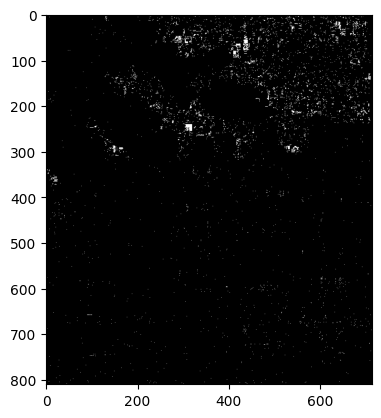

In [71]:
#1.Lösungsweg
#diff=1-np.isclose(img1,img2,atol=0)
diff=np.isclose(img1,img2,atol=0)
plt.imshow(diff,cmap='gray')

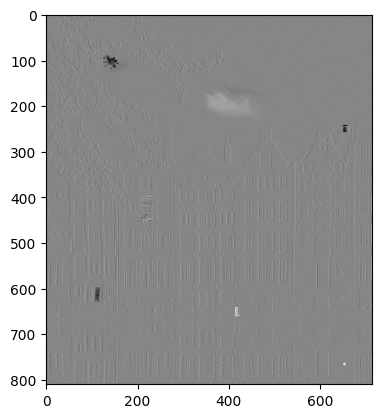

In [72]:
#2.Lösungsweg
plt.imshow((img1-img2),cmap="gray")



##Aufg. 4.2
Wandle das Ergebnisbild in ein Binärbild, das veränderte Pixel als Vordergrund und unveränderte Pixel als Hintergrund beinhaltet.

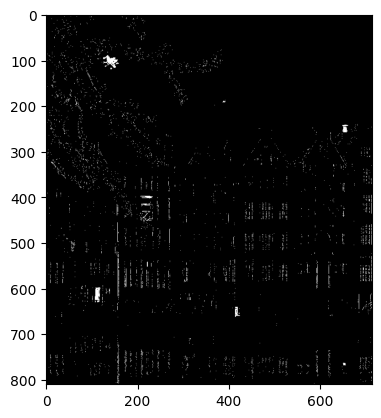

In [73]:
#diff=img1-img2
diff=np.abs(img1-img2)

threshold = 0.18 # Schwellenwert für die Differenz

binary_diff = np.zeros(diff.shape, dtype=np.uint8)
binary_diff[np.abs(diff) > threshold] = 255

plt.imshow(binary_diff,cmap='gray')


##Aufg. 4.3

Anzahl der veränderten Bereiche: 5


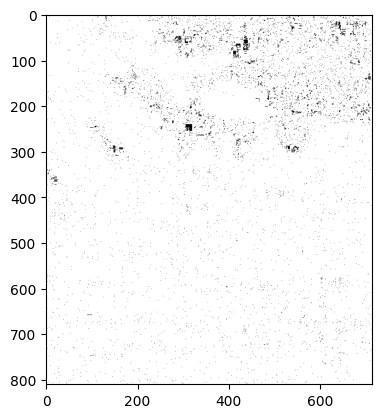

In [78]:


def count_changed_areas(binary_diff):
    visited = np.zeros(binary_diff.shape, dtype=np.uint8)  # Array, um besuchte Pixel zu markieren
    num_areas = 0  # Anzahl der veränderten Bereiche

    # Nachbarschaftsdefinition (8-Nachbarschaft)
    neighborhood = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

    for i in range(binary_diff.shape[0]):
        for j in range(binary_diff.shape[1]):
            if binary_diff[i, j] == 255 and visited[i, j] == 0:  # Überprüfe, ob Pixel verändert und nicht besucht
                num_areas += 1
                visited[i, j] = 255  # Markiere aktuelles Pixel als besucht

                stack = [(i, j)]  # Starte Stapel mit aktuellem Pixel

                while stack:
                    pixel = stack.pop()  # Nehme ein Pixel aus dem Stapel
                    row, col = pixel

                    for n in range(-1, 2):
                        for m in range(-1, 2):
                            if n == 0 and m == 0:  # Überspringe das aktuelle Pixel
                                continue

                            new_row, new_col = row + n, col + m

                            if (
                                new_row >= 0
                                and new_row < binary_diff.shape[0]
                                and new_col >= 0
                                and new_col < binary_diff.shape[1]
                                and binary_diff[new_row, new_col] == 255
                                and visited[new_row, new_col] == 0
                            ):
                                visited[new_row, new_col] = 255  # Markiere Nachbarpixel als besucht
                                stack.append((new_row, new_col))  # Füge Nachbarpixel zum Stapel hinzu

    return num_areas



diff = img1 - img2

threshold = 0.0002  # Schwellenwert für die Differenz

binary_diff = np.zeros(diff.shape, dtype=np.uint8)
binary_diff[np.abs(diff) > threshold] = 255

plt.imshow(binary_diff,cmap='gray')

num_areas = count_changed_areas(binary_diff)
print("Anzahl der veränderten Bereiche:", num_areas)
